# Stock Analysis in Python

In this notebook, I aim to conduct a comprehensive analysis of four prominent stocks: Apple (AAPL), Tesla (TSLA), Disney (DIS), and Advanced Micro Devices (AMD). By employing a combination of data science techniques and financial metrics, I will delve into the historical performance of these companies, assess their risk-return profiles, and identify potential patterns and relationships.

**Methodology:**

The analysis will encompass the following steps for each stock:


*   *Data Acquisition*: Retrieve historical stock price data for the specified period.
*   *Descriptive Statistics*: Calculate essential statistical measures including standard deviation, kurtosis, and skewness of daily returns.
*   *Return Analysis:* Compute daily and cumulative returns to understand price fluctuations over time.
*   *Distribution Analysis:* Visualize the distribution of daily returns using histograms and explore their characteristics.
*   *Correlation Analysis:* Examine the relationships between the four stocks using pairplots and correlation matrices.
*   *Risk and Return Analysis:* Calculate beta, alpha, and Sharpe ratio to assess the risk-adjusted performance of each stock.


By systematically applying these analyses, I aim to gain valuable insights into the investment behavior of these tech giants and provide a foundation for further financial modeling and decision-making.

In [13]:
#install dependencies
!pip install yfinance
!pip install quantstats
!pip install pyportfolioopt
!pip install ta

ERROR: Could not find a version that satisfies the requirement matplotlib-mpl-fonts (from versions: none)
ERROR: No matching distribution found for matplotlib-mpl-fonts


In [14]:
# Importing Libraries

# Data handling and statistical analysis
import pandas as pd
from pandas_datareader import data
import numpy as np
from scipy import stats

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib import rcParams

# Financial data
import quantstats as qs
import ta
import yfinance as yf

# Linear Regression Model
from sklearn.linear_model import LinearRegression

# Enabling Plotly offline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Datetime and hiding warnings
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
import logging

## Daily Returns

A stock's daily return is the percentage change in price over a singular day. It is calculated as following:

CP0: Closing Price Day 0

CP1: Closing Price Day 1

Formula: ((CP1 - CP0) / CP0) * 100

Daily Returns provide a quick way to check the performance of a stock over time.

### Download Financial Data

Using the Quantstats library to download data for four different stocks over a 10-year period. Also downloading the data for the SP500 to use as a benchmark over the same time period.

In [4]:
#getting daily returns for 4 different US stocks + benchmark in the same time window
aapl = qs.utils.download_returns('AAPL')
aapl = aapl.loc['2014-07-01':'2024-06-15']

tsla = qs.utils.download_returns('TSLA')
tsla = tsla.loc['2014-07-01':'2024-06-15']

dis = qs.utils.download_returns('DIS')
dis = dis.loc['2014-07-01':'2024-06-15']

amd = qs.utils.download_returns('AMD')
amd = amd.loc['2014-07-01':'2024-06-15']

sp500 = qs.utils.download_returns('^GSPC')
sp500 = sp500.loc['2014-07-01':'2024-06-15']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


### Convert Timezone and Plot

By converting data to be in the same timezone, we can ensure that all data points are aligned on the same time scale, allowing for fair comparisons. We also improve accuracy as calculations like daily returns are based on consistent time intervals.

After converting, we use the Quantstats' daily returns function to plot our daily returns.

In [5]:
#converting timezones
aapl.index = aapl.index.tz_localize(None)
tsla.index = tsla.index.tz_localize(None)
dis.index = dis.index.tz_localize(None)
amd.index = amd.index.tz_localize(None)
sp500.index = sp500.index.tz_localize(None)

Apple Daily Returns Plot:



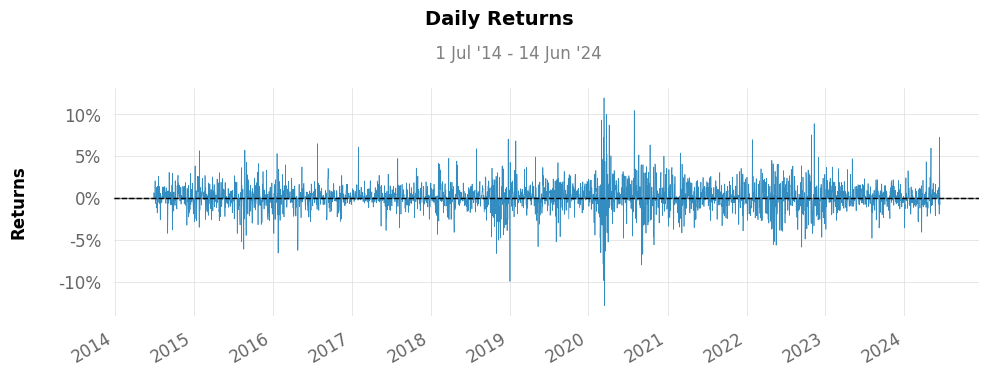






Tesla Inc. Daily Returns Plot:



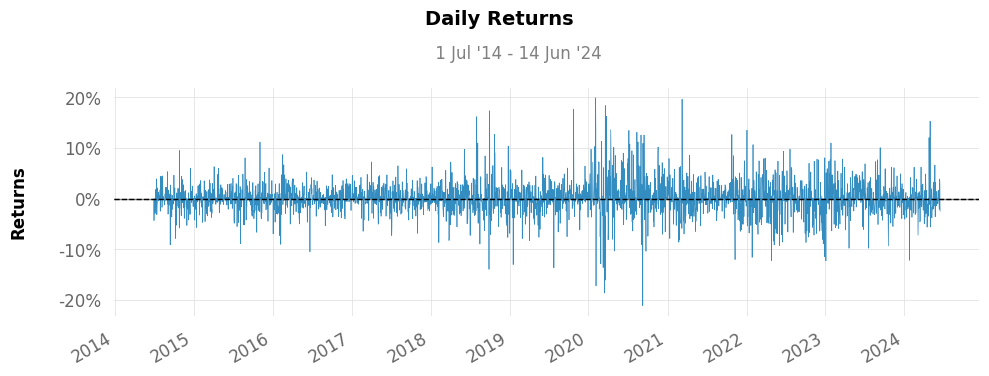






The Walt Disney Company Daily Returns Plot:



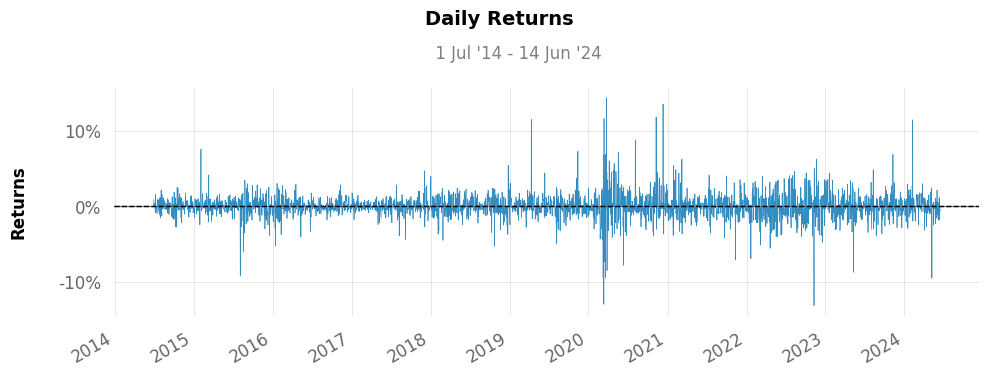






Advances Micro Devices, Inc. Daily Returns Plot:



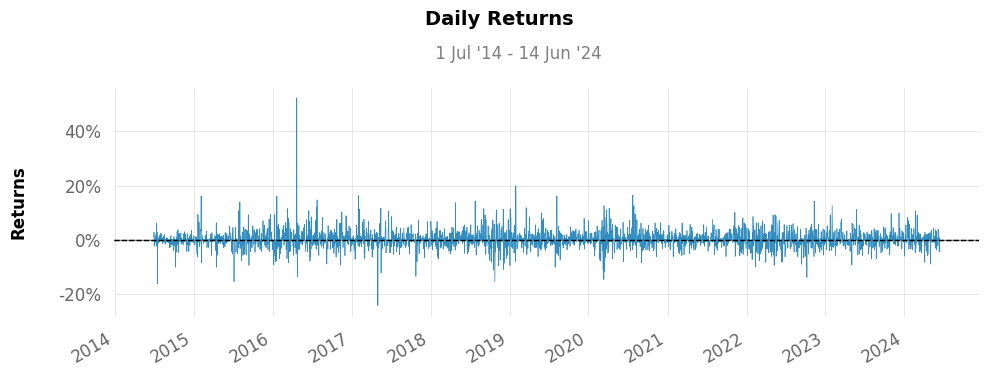

In [15]:
#plotting Daily Returns for each stock

#setting the font to prevent warnings
plt.rcParams['font.family'] = 'sans-serif'

print('Apple Daily Returns Plot:\n')
qs.plots.daily_returns(aapl, sp500)
print('\n')
print('\n')

print('\nTesla Inc. Daily Returns Plot:\n')
qs.plots.daily_returns(tsla, sp500)
print('\n')
print('\n')

print('\nThe Walt Disney Company Daily Returns Plot:\n')
qs.plots.daily_returns(dis, sp500)
print('\n')
print('\n')

print('\nAdvances Micro Devices, Inc. Daily Returns Plot:\n')
qs.plots.daily_returns(amd, sp500)

### Analysis Based On Daily Returns

**Apple:**

There doesn't appear to be a consistent upward or downward trend in the returns over the entire period. However, there does seem to be some volatility around 2019 - 2022 which could have something to do with the COVID-19 Pandemic.

**Tesla:**

The most prominent characteristic of the data is its volatility. Returns frequently oscillate between positive and negative extremes, indicating substantial price fluctuations on a daily basis. The volatility in the stock price increased after 2018.

**Disney:**

A notable increase in volatility is observed around late 2019 and early 2020, coinciding with the onset of the COVID-19 pandemic. This period is characterized by sharp price swings, indicating the significant impact of the pandemic on the asset's value.

**AMD:**

The first half of the graph shows significant volatility but this reduces in the latter half. The effect of COVID-19 is not as pronounced for AMD as it is for the other compnaies. Infact, the stock's volatility seems to reduce post-pandemic.



## Cumulative Returns

Cumulative return is the total change in the price of an investment over a specific period. It shows the overall gain or loss from the initial investment to the end of the period.

Formula: (Ending value - Beginning value) / Beginning value

Cumulative return considers the effect of reinvesting dividends and capital gains, showing a picture of the asset's overall performace over time.

### Plot Returns

Apple Cumulative Returns Plot



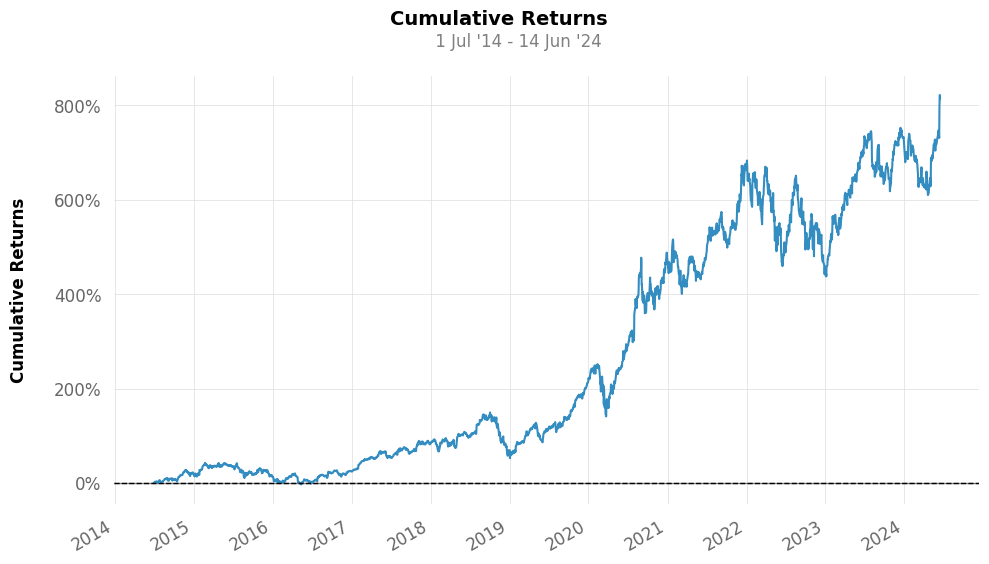






Tesla Inc. Cumulative Returns Plot



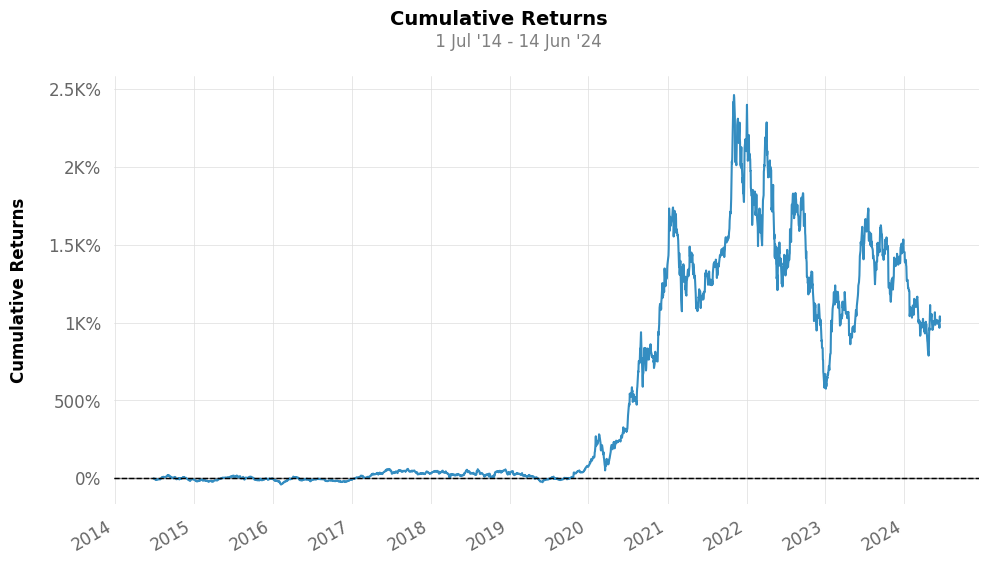






The Walt Disney Company Cumulative Returns Plot



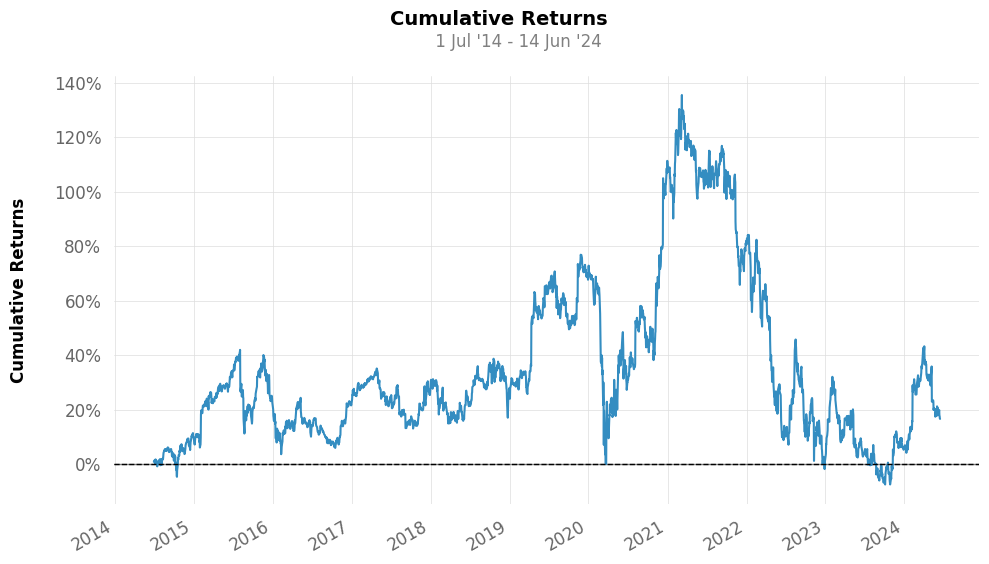






Advances Micro Devices, Inc. Cumulative Returns Plot



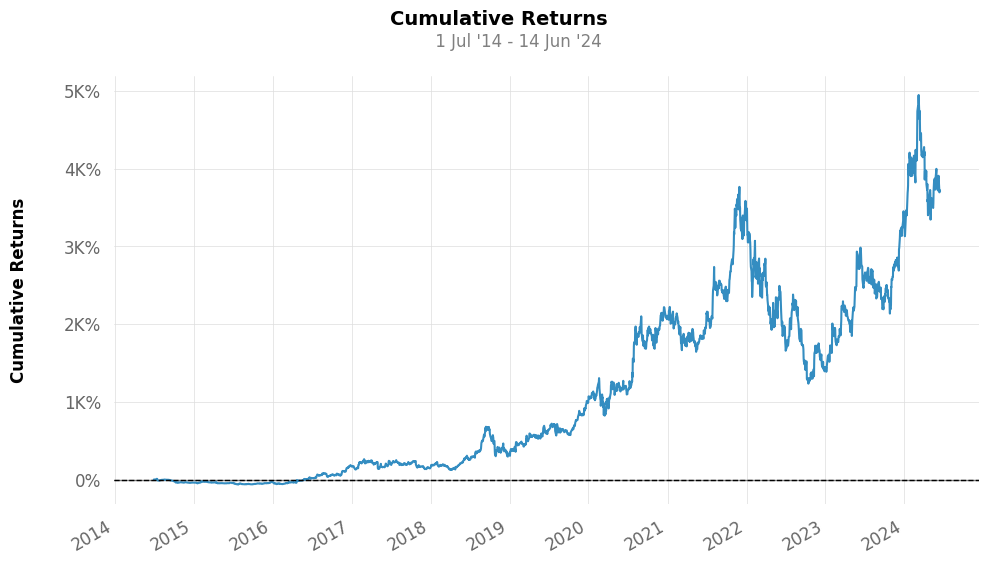

In [8]:
#plotting Cumulative Returns for each stock
print('Apple Cumulative Returns Plot\n')
qs.plots.returns(aapl)
print('\n')
print('\n')

print('\nTesla Inc. Cumulative Returns Plot\n')
qs.plots.returns(tsla)
print('\n')
print('\n')

print('\nThe Walt Disney Company Cumulative Returns Plot\n')
qs.plots.returns(dis)
print('\n')
print('\n')

print('\nAdvances Micro Devices, Inc. Cumulative Returns Plot\n')
qs.plots.returns(amd)

### Analysis Based On Cumulative Returns

**Apple:**

The cumulative returns chart presents a strong upward trajectory, indicating substantial growth in the underlying asset's value over the ten-year period. The period surrounding 2020 shows a sharp decline in cumulative returns, likely reflecting the market downturn caused by the pandemic. However, a strong recovery followed, indicating resilience in the asset's value. Post-pandemic, the cumulative returns have resumed their upward trend, surpassing pre-pandemic levels.

**Tesla:**

Whilst there was a positive upward trend post-pandemic, the asset's performance has been marked by periods of rapid ascent and sharp declines, indicating high volatility. This suggests a high-risk, high-reward investment. Investors would have experienced periods of significant gains and losses.

**Disney:**

The cumulative returns chart illustrates a compelling investment marked by both substantial growth and significant volatility. The asset's resilience in overcoming challenges posed by the COVID-19 pandemic is evident. However, the potential impact of the Israel war and the asset's overall high-risk profile should be kept in mind.

**AMD:**

The first half of the graph shows significant volatility but this reduces in the latter half. The effect of COVID-19 is not as pronounced for AMD as it is for the other compnaies. Infact, the stock's volatility seems to reduce post-pandemic.

## Histograms

Histograms are a graphical representation of the distribution of values, displaying how frequent they are in a dataset.


Histograms of daily returns are valuable to help investors to identify patterns, such as the range of daily returns of an asset over a certain period, indicating its level of stability and volatility.

### Plot Histograms

Apple Daily Returns Histogram


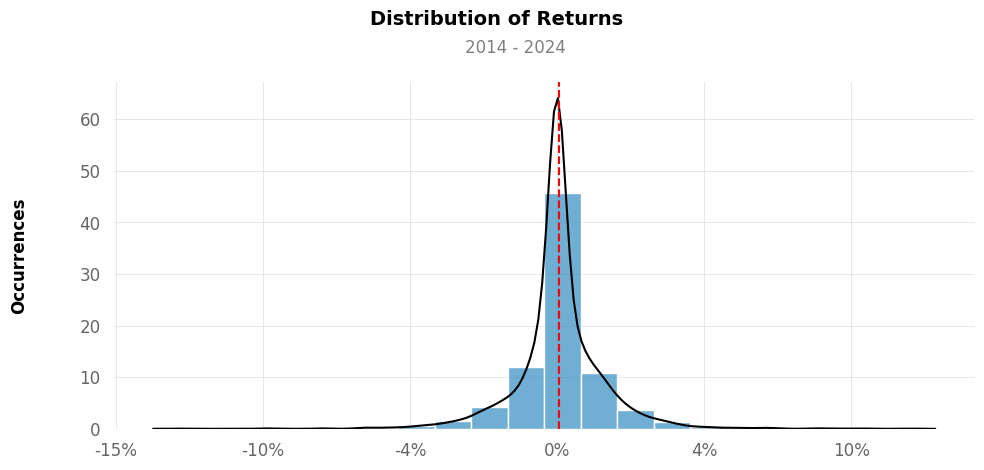




Tesla Inc. Daily Returns Histogram


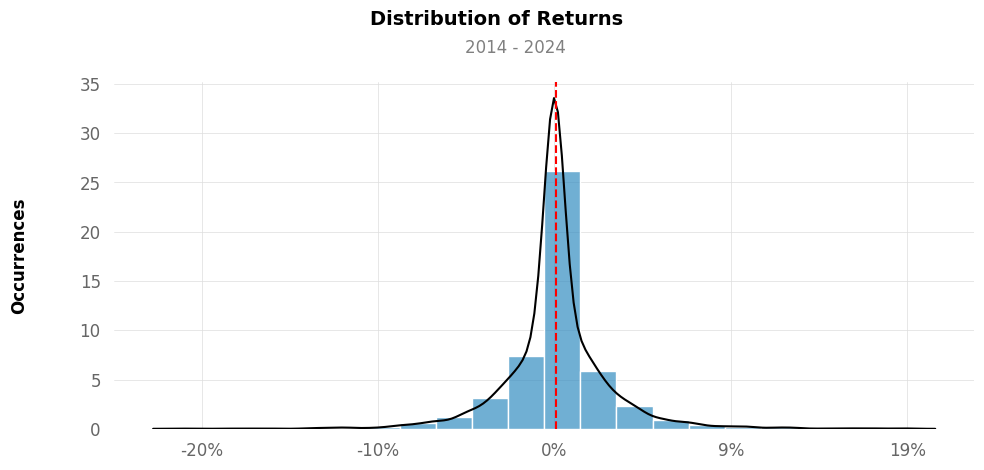




The Walt Disney Company Daily Returns Histogram


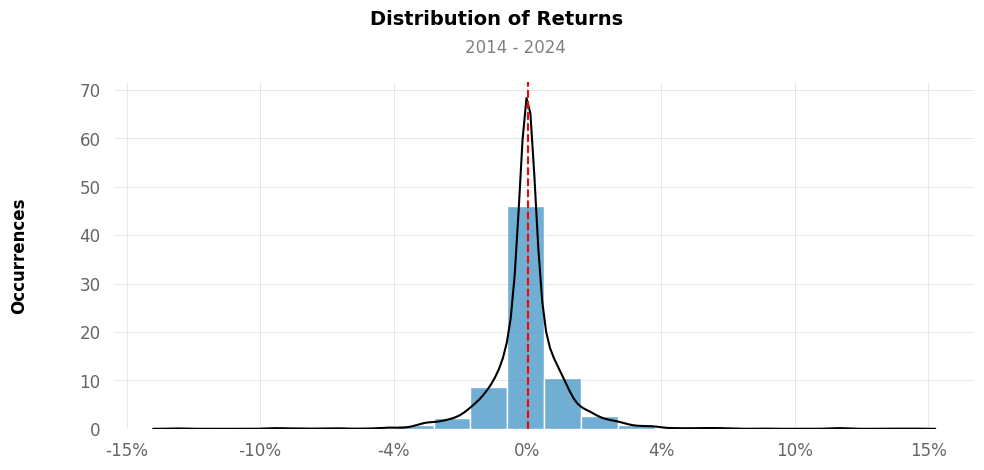




Advances Micro Devices, Inc. Daily Returns Histogram


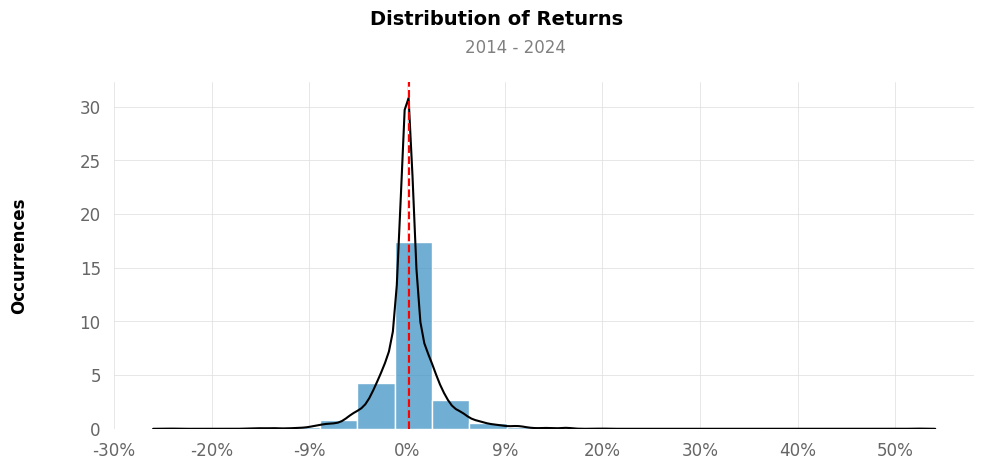

In [9]:
print('Apple Daily Returns Histogram')
qs.plots.histogram(aapl, resample = 'D')
print('\n')
print('\nTesla Inc. Daily Returns Histogram')
qs.plots.histogram(tsla, resample = 'D')
print('\n')
print('\nThe Walt Disney Company Daily Returns Histogram')
qs.plots.histogram(dis, resample = 'D')
print('\n')
print('\nAdvances Micro Devices, Inc. Daily Returns Histogram')
qs.plots.histogram(amd, resample = 'D')

### Analysis Based on Histograms

**Apple:**

The distribution is significantly skewed to the right, indicating that there are more positive returns than negative ones. The distribution peaks around the 0% return mark, suggesting that a large number of days experienced little to no change in value.

**Tesla:**

The distribution is slightly skewed to the right, indicating that there are more positive returns than negative ones. The distribution appears to be leptokurtic, meaning it has a sharper peak and fatter tails than a normal distribution. This emphasizes the volatility of the asset.

**Disney:**

Disney's stocks have more balanced returns with values ranging from -15% to 15%, while most returns are closer to the mean.

**AMD:**

It's easy to see some extreme values that are distant from the mean, with daily returns of around 50%, indicating the presence of outliers in the positive range of the distribution, in contrast with the negative field where it seems to limit at about -30%.

## Kurtosis

Kurtosis is a statistical measure that quantifies the "tailedness" of a probability distribution. It indicates how much data resides in the tails relative to the center. A high kurtosis value for daily stock returns implies frequent and extreme price fluctuations distant from the average. This translates to a leptokurtic distribution, characterized by a sharp peak and heavy tails in the histogram. While such stocks are associated with elevated risk due to these pronounced price swings, they also present opportunities for substantial gains.

### Measure Kurtosis

In [16]:
print("Apple's kurtosis: ", qs.stats.kurtosis(aapl).round(3))
print('\n')
print("Tesla's kurtosis: ", qs.stats.kurtosis(tsla).round(3))
print('\n')
print("Walt Disney's kurtosis: ", qs.stats.kurtosis(dis).round(3))
print('\n')
print("Advances Micro Devices' kurtosis: ", qs.stats.kurtosis(amd).round(3))

Apple's kurtosis:  5.315


Tesla's kurtosis:  4.408


Walt Disney's kurtosis:  11.664


Advances Micro Devices' kurtosis:  18.739


### Analysis Based on Kurtosis

A kurtosis value greater than 3 generally indicates a leptokurtic distribution.

**Apple:**

Excess kurtosis suggests that Apple is Leptokurtic. This indicates a higher probability of extreme price movements (both positive and negative) compared to a normally distributed asset.

**Tesla:**

Excess kurtosis suggests that Tesla is Leptokurtic. This indicates a higher probability of extreme price movements (both positive and negative) compared to a normally distributed asset. Tesla is the most stable of the four assets.

**Disney:**

Excess kurtosis suggests that Disney is Leptokurtic. This indicates a higher probability of extreme price movements (both positive and negative) compared to a normally distributed asset.

**AMD:**

AMD has the highest kurtosis, which indicates that AMD is subject to an extremely high level of volatility and tail risk, with a large concentration of extreme price movements.

## Skewness

Skewness is a statistical measure that describes the asymmetry of a probability distribution.

Positive skewness indicates a longer tail to the right, with more extreme positive values, while negative skewness implies a longer tail to the left, with more extreme negative values. In stock analysis, skewness is a valuable tool. A positively skewed distribution suggests a higher likelihood of large positive returns, which is generally favorable for investors. Conversely, a negatively skewed distribution indicates a greater risk of substantial losses.

### Measure Skewness

In [17]:
print("Apple's skewness: ", qs.stats.skew(aapl).round(3))
print('\n')
print("Tesla's skewness: ", qs.stats.skew(tsla).round(3))
print('\n')
print("Walt Disney's skewness: ", qs.stats.skew(dis).round(3))
print('\n')
print("Advances Micro Devices' skewness: ", qs.stats.skew(amd).round(3))

Apple's skewness:  0.008


Tesla's skewness:  0.21


Walt Disney's skewness:  0.324


Advances Micro Devices' skewness:  1.274


### Analysis Based on Skewness

**Apple:**

Very slightly positively skewed. This suggests a lower incidence of outliers.

**Tesla:**

Slightly positively skewed. This suggests a lower incidence of outliers.

**Disney:**

Slightly positively skewed. This suggests a lower incidence of outliers.

**AMD:**

Strongly positively skewed. This corroborates with its histogram and kurtosis value. AMD has a lot of outliers on the positive tail, which could've been a good thing for those who bought its shares but it also suggests higher volatility and risk to this investment.

## Standard Deviation

Standard deviation is a statistical measure that quantifies the dispersion of a dataset from its mean. When applied to a stock's daily returns, it serves as a proxy for its volatility. A higher standard deviation indicates greater price fluctuations, implying a riskier investment. Conversely, a lower standard deviation suggests more stable price movements, generally associated with lower risk.

### Calculate Standard Deviation

In [19]:
print("Apple's Standard Deviation from 2014 to 2024: ", aapl.std().round(3))
print("\nTesla's Standard Deviation from 2014 to 2024: ", tsla.std().round(3))
print("\nDisney's Standard Deviation from 2014 to 2024: ", dis.std().round(3))
print("\nAMD's Standard Deviation from 2014 to 2024: ", amd.std().round(3))

Apple's Standard Deviation from 2014 to 2024:  0.018

Tesla's Standard Deviation from 2014 to 2024:  0.035

Disney's Standard Deviation from 2014 to 2024:  0.017

AMD's Standard Deviation from 2014 to 2024:  0.037


### Analysis Based on SD

**Apple:**

Low volatility. Similar to Disney, Apple's daily returns exhibited relatively low volatility during the analyzed period.

**Tesla:**

High volatility. Tesla's daily returns displayed a higher degree of volatility than Apple and Walt Disney, but slightly lower than AMD.

**Disney:**

Low volatility. Compared to the other companies, Disney's daily returns exhibited the least amount of variation.

**AMD:**

High volatility. AMD's daily returns exhibited the most significant variation among the four companies. This indicates that AMD's stock price experienced larger price swings, both upwards and downwards, compared to the other companies.

## Pairplots and Correlation Matrix

Correlation Analysis measures the relationship between the price movements of different assets. A classic example is the Long-Short strategy, where investors profit from the inverse relationship between two stocks. By identifying assets with a strong negative correlation, investors can construct portfolios that hedge against market fluctuations. Furthermore, diversification, selecting assets with low correlation, can mitigate market risk.

Pairplots provide a graphical overview of the relationship between multiple variables, while correlation matrices offer a numerical summary. A correlation coefficient ranges from -1 to 1. A value of -1 indicates a perfect negative correlation, meaning assets move in opposite directions, while 1 signifies a perfect positive correlation, indicating assets move in tandem.

### Plot

In [34]:
#merge into one dataframe
merged_df = pd.concat([aapl, tsla, dis, amd], join = 'outer', axis = 1)
merged_df.columns = ['aapl', 'tsla', 'dis', 'amd']
merged_df

,aapl,tsla,dis,amd
Date,,,,
2014-07-01,0.006349,-0.001416,0.008514,0.007160
2014-07-02,-0.000428,-0.042925,-0.000347,0.028436
2014-07-03,0.005884,-0.000785,0.004627,-0.023042
2014-07-07,0.020632,-0.028746,-0.002879,0.004717
2014-07-08,-0.006460,-0.016123,-0.008430,-0.009390
...,...,...,...,...
2024-06-10,-0.019148,-0.020791,0.011818,-0.044856
2024-06-11,0.072649,-0.018010,-0.018201,-0.008607
2024-06-12,0.028578,0.038849,-0.000694,0.008052


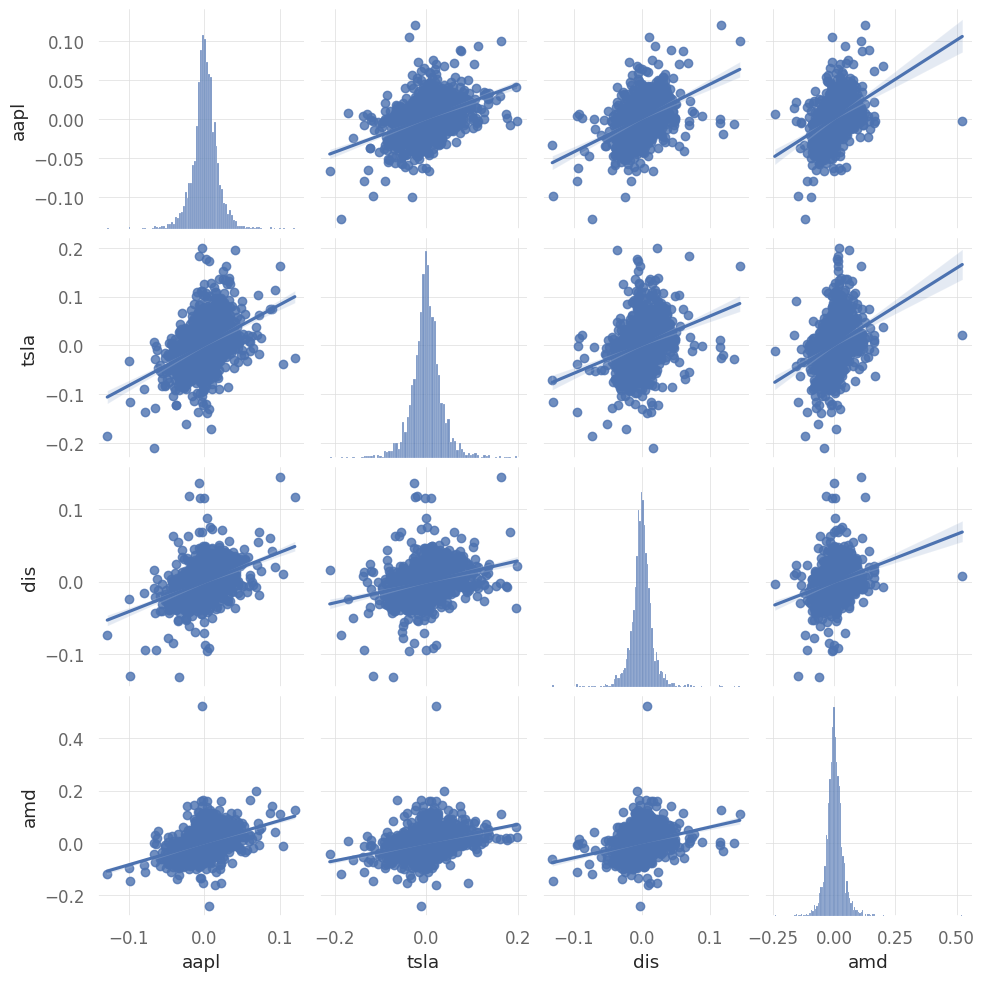

In [21]:
#pairplots
sns.pairplot(merged_df, kind = 'reg')
plt.show()

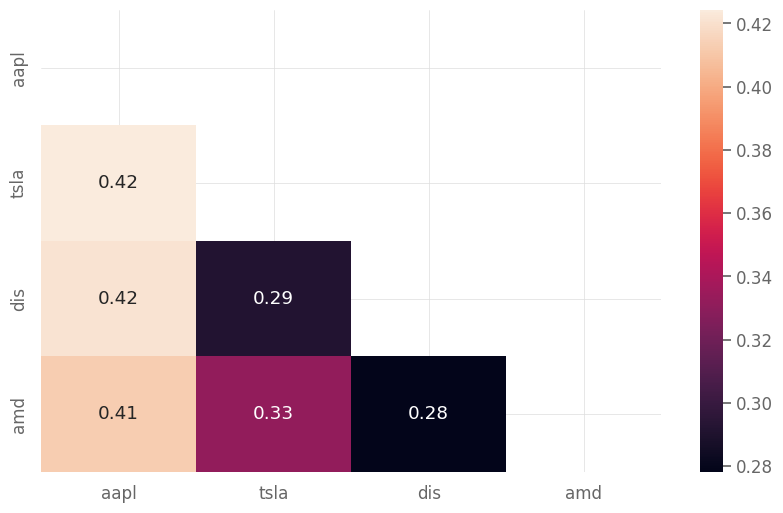

In [23]:
#correlation matrix
corr = merged_df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask = mask)
plt.show()

### Analysis Based on The Plots

**Pairplots:**

Apple (aapl): Shows moderate positive correlation with Disney (dis) and a weaker positive correlation with Tesla (tsla) and AMD (amd).

Tesla (tsla): Exhibits moderate positive correlation with AMD (amd) and a weaker positive correlation with Apple (aapl) and Disney (dis).

Disney (dis): Shows moderate positive correlation with Apple (aapl) and a weaker positive correlation with Tesla (tsla) and AMD (amd).

AMD (amd): Displays moderate positive correlation with Tesla (tsla) and a weaker positive correlation with Apple (aapl) and Disney (dis).

The pairplot suggests that the four stocks exhibit some degree of positive correlation with each other. This means that when one stock's price goes up, the others tend to go up as well, and vice versa. However, the correlations are not very strong, indicating that the stocks can also move independently.

**Correlation Matrix**

Apple and the other three companies exhibit a strong positive correlation of 0.42/0.41. This indicates that their stock prices tend to move together closely. When one goes up, the other is likely to go up as well, and vice versa.

Tesla and AMD show a moderate positive correlation of 0.33, indicating a similar tendency to move together.

The relationship between Tesla and Disney, is weaker with a correlation coefficient of 0.29. This suggests that while these stocks might have some tendency to move together, their movements are less synchronized compared to the other pairs.

It's important to note that there is not any negative correlation among the assets above, which indicates that none of them acts to limit losses. These assets cannot be used to hedge each other.

## Beta and Alpha

Beta and alpha are essential metrics used to assess a stock's performance relative to a benchmark, typically a market index like the S&P 500.


*   Beta measures a stock's volatility compared to the overall market. A beta of 1 indicates the stock moves in line with the market. A beta greater than 1 suggests higher volatility, while a beta less than 1 implies lower volatility.

*   Alpha represents a stock's excess return compared to its expected return based on its beta. A positive alpha signifies the stock outperformed its benchmark, while a negative alpha indicates underperformance.

A high alpha with a manageable beta is often sought after.



### Calculate

In [24]:
#removing indexes
sp500_no_index = sp500.reset_index(drop = True)
aapl_no_index = aapl.reset_index(drop = True)
tsla_no_index = tsla.reset_index(drop = True)
dis_no_index = dis.reset_index(drop = True)
amd_no_index = amd.reset_index(drop = True)

In [31]:
#function to use linear regression to calculate beta and alpha
def calculate_beta_alpha(no_index_bench, no_index, company_name):

  X = no_index_bench.values.reshape(-1,1)
  y = no_index.values.reshape(-1,1)

  linreg = LinearRegression().fit(X, y)

  beta = linreg.coef_[0]
  alpha = linreg.intercept_

  print('\n')
  print(f'{company_name} Beta: ', beta.round(3))
  print(f'\n{company_name} Alpha: ', alpha.round(4))

In [32]:
#function calls
calculate_beta_alpha(sp500_no_index, aapl_no_index, 'Apple')
calculate_beta_alpha(sp500_no_index, tsla_no_index, 'Tesla')
calculate_beta_alpha(sp500_no_index, dis_no_index, 'Disney')
calculate_beta_alpha(sp500_no_index, amd_no_index, 'AMD')



Apple Beta:  [1.198]

Apple Alpha:  [0.0005]


Tesla Beta:  [1.442]

Tesla Alpha:  [0.0009]


Disney Beta:  [0.994]

Disney Alpha:  [-0.0003]


AMD Beta:  [1.616]

AMD Alpha:  [0.0014]


### Analysis Based on Beta and Alpha

**Apple:**

Beta: 1.198. Apple's beta is slightly above 1, indicating that it's slightly more volatile than the overall market.

Alpha: 0.0005. Apple's alpha is very close to zero, suggesting it has performed very close to its expected return based on its beta.

**Tesla:**

Beta: 1.442. Tesla's beta is significantly higher than 1, indicating it's considerably more volatile than the overall market.

Alpha: 0.0009. Tesla's alpha is slightly positive, suggesting it has marginally outperformed its expected return based on its beta.

**Disney:**

Beta: 0.994. Disney's beta is very close to 1, indicating it moves very similarly to the overall market.

Alpha: -0.0003. Disney's alpha is slightly negative, suggesting it has marginally underperformed its expected return based on its beta.

**AMD:**

Beta: 1.616. AMD's beta is significantly higher than 1, indicating it's considerably more volatile than the overall market.

Alpha: 0.0014. AMD's alpha is slightly positive, suggesting it has marginally outperformed its expected return based on its beta.

*All four companies have alphas close to zero, indicating their performance has been largely in line with their expected returns based on their market risk (beta)*

## Sharpe Ratio

The Sharpe ratio is a key metric for evaluating an investment's risk-adjusted return. It measures how much excess return (the difference between the investment's return and the risk-free rate) an investor receives for each unit of risk taken. A higher Sharpe ratio indicates better performance, as it implies higher returns for a given level of risk.

Generally, a Sharpe ratio below 1 is considered poor, as the investment doesn't adequately compensate for its risk. A ratio of 1 is acceptable, while 2 or more is often seen as very good. Exceptionally strong investments may exhibit Sharpe ratios of 3 or higher.

### Calculate

In [33]:
print("Sharpe Ratio for AAPL: ", qs.stats.sharpe(aapl).round(2))
print("\nSharpe Ratio for TSLA: ", qs.stats.sharpe(tsla).round(2))
print("\nSharpe Ratio for DIS: ", qs.stats.sharpe(dis).round(2))
print("\nSharpe Ratio for AMD: ", qs.stats.sharpe(amd).round(2))

Sharpe Ratio for AAPL:  0.92

Sharpe Ratio for TSLA:  0.71

Sharpe Ratio for DIS:  0.19

Sharpe Ratio for AMD:  0.91


### Analysis Based on Sharpe Ratio

**Apple:**

Apple's ratio is below 1 which may suggest that asset's average returns are beneath the risk-free rate of return.

**Tesla:**

Tesla's Sharpe ratio of 0.71 might suggest that while Tesla has generated returns, it has also carried a higher level of risk relative to those returns.

**Disney:**

Disney's Sharpe ratio of 0.19 is notably lower. This implies that Disney's returns have not compensated adequately for the level of risk involved.

**AMD:**

AMD's ratio is below 1 which may suggest that asset's average returns are beneath the risk-free rate of return.